# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as sla
from numpy.linalg import multi_dot

np.random.seed(5)

num_steps = 100000
epsilon = 1e-5

In [2]:
def add_ones(X):
    ones = np.ones((X.shape[0], 1))
    return np.concatenate((ones, X), axis = 1)

def get_weights_using_normal_equation(X, y):
    X = add_ones(X)
    X_transposed = np.transpose(X)

    w = multi_dot([sla.inv(np.dot(X_transposed, X)), X_transposed, y])
    return w

def default_gradient_descent_algorithm(X, y, num_steps, step_size, epsilon):
    X = add_ones(X)
    X_transposed = np.transpose(X)
    w_0 = np.random.random(X.shape[1])
    
    w = w_0.copy()
    w_history = [w.copy()]

    for i in range(num_steps):
        w -= step_size * 2 * np.dot(X_transposed, np.dot(X, w) - y) / X.shape[0]
        w_history.append(w.copy())
        if np.linalg.norm(w_history[-1] - w_history[-2]) < epsilon:
            break

    return w, np.array(w_history)            

X = np.array([[2],
              [3],
              [5]])
y = np.array([1, 3, 4])

w_normal_equation = get_weights_using_normal_equation(X, y)
w_gradient_descent, w_history = default_gradient_descent_algorithm(X, y, num_steps, 0.01, epsilon)
print(f"w using normal equation:\n{w_normal_equation}")
print(f"w using gradient descent:\n{w_gradient_descent}")
print("history of gradient descent method:")
w_history

w using normal equation:
[-0.42857143  0.92857143]
w using gradient descent:
[-0.42437543  0.92745712]
history of gradient descent method:


array([[ 0.22199317,  0.87073231],
       [ 0.21283782,  0.84201391],
       [ 0.20578014,  0.8211812 ],
       ...,
       [-0.4243561 ,  0.92745199],
       [-0.42436578,  0.92745456],
       [-0.42437543,  0.92745712]])

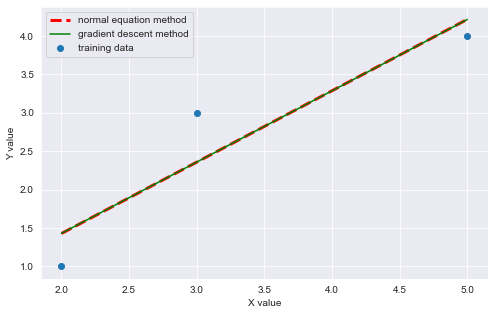

In [3]:
y_predict = lambda x, w : np.dot(add_ones(x), w)

plt.figure(figsize=(8, 5))
plt.plot(X, y_predict(X, w_normal_equation), label='normal equation method', color='red', linestyle='--', linewidth=3)
plt.plot(X, y_predict(X, w_gradient_descent), label='gradient descent method', color='green')
plt.scatter(X, y, label='training data')
plt.legend(['normal equation method', 'gradient descent method', 'training data'])
plt.xlabel('X value')
plt.ylabel('Y value')

plt.show()

**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [4]:
data_train = np.loadtxt("../задание 1/ml_lab1_train.txt", delimiter=',')
data_train

array([[-0.2       ,  4.10083261],
       [-0.14      ,  4.75632474],
       [-0.08      ,  4.16278839],
       [-0.02      ,  4.94568077],
       [ 0.04      ,  4.9964461 ],
       [ 0.1       ,  3.67344585],
       [ 0.16      ,  4.07405522],
       [ 0.22      ,  4.12650853],
       [ 0.28      ,  5.25101279],
       [ 0.34      ,  5.69160283],
       [ 0.4       ,  5.06788376],
       [ 0.46      ,  6.07176274],
       [ 0.52      ,  5.76661215],
       [ 0.58      ,  5.76998646],
       [ 0.64      ,  5.39647832],
       [ 0.7       ,  5.46744837],
       [ 0.76      ,  5.46450349],
       [ 0.82      ,  7.23168494],
       [ 0.88      ,  6.09781368],
       [ 0.94      ,  7.0778812 ],
       [ 1.        ,  7.05182585]])

In [5]:
X_train = data_train[:,0]
Y_train = data_train[:,1]

In [6]:
data_test = np.loadtxt("../задание 1/ml_lab1_test.txt", delimiter=",")
data_test

array([[-0.3       ,  4.22468198],
       [-0.23      ,  3.6806801 ],
       [-0.16      ,  4.86193723],
       [-0.09      ,  4.12182311],
       [-0.02      ,  3.89129282],
       [ 0.05      ,  4.77528678],
       [ 0.12      ,  4.84650657],
       [ 0.19      ,  3.29232057],
       [ 0.26      ,  3.77839618],
       [ 0.33      ,  4.16851703],
       [ 0.4       ,  5.43651587],
       [ 0.47      ,  4.74066998],
       [ 0.54      ,  5.45091177],
       [ 0.61      ,  5.23766541],
       [ 0.68      ,  5.84027585],
       [ 0.75      ,  5.79299791],
       [ 0.82      ,  7.12448917],
       [ 0.89      ,  6.11752856],
       [ 0.96      ,  6.00190132],
       [ 1.03      ,  7.26882794],
       [ 1.1       ,  7.48272721]])

In [7]:
X_test = data_test[:, 0]
Y_test = data_test[:, 1]

In [8]:
X_train_2d = X_train[:, np.newaxis]
w_normal_equation = get_weights_using_normal_equation(X_train_2d, Y_train)
print(f"w using normal equation:\n{w_normal_equation}")
w_gradient_descent_1, w_history = default_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.1, epsilon)
print(f"gradient descent with n = 0.1:\n{w_gradient_descent_1}")
print(f"steps number: {w_history.shape[0]}")
w_gradient_descent_2, w_history = default_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.5, epsilon)
print(f"gradient descent with n = 0.5:\n{w_gradient_descent_2}")
print(f"steps number: {w_history.shape[0]}")
w_gradient_descent_3, w_history = default_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 1, epsilon)
print(f"gradient descent with n = 1:\n{w_gradient_descent_3}")
print(f"steps number: {w_history.shape[0]}")
w_history

w using normal equation:
[4.43323091 2.2791345 ]
gradient descent with n = 0.1:
[4.43305208 2.27953156]
steps number: 312
gradient descent with n = 0.5:
[4.43320143 2.27919995]
steps number: 62


C:\Users\bred7\AppData\Local\Temp\ipykernel_6208\2382520368.py:21: RuntimeWarning: overflow encountered in multiply
  w -= step_size * 2 * np.dot(X_transposed, np.dot(X, w) - y) / X.shape[0]
C:\Users\bred7\AppData\Local\Temp\ipykernel_6208\2382520368.py:21: RuntimeWarning: invalid value encountered in subtract
  w -= step_size * 2 * np.dot(X_transposed, np.dot(X, w) - y) / X.shape[0]


gradient descent with n = 1:
[nan nan]
steps number: 100001


array([[ 0.76590786,  0.51841799],
       [ 9.50912716,  4.48053487],
       [-2.40378565, -0.86579995],
       ...,
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan]])

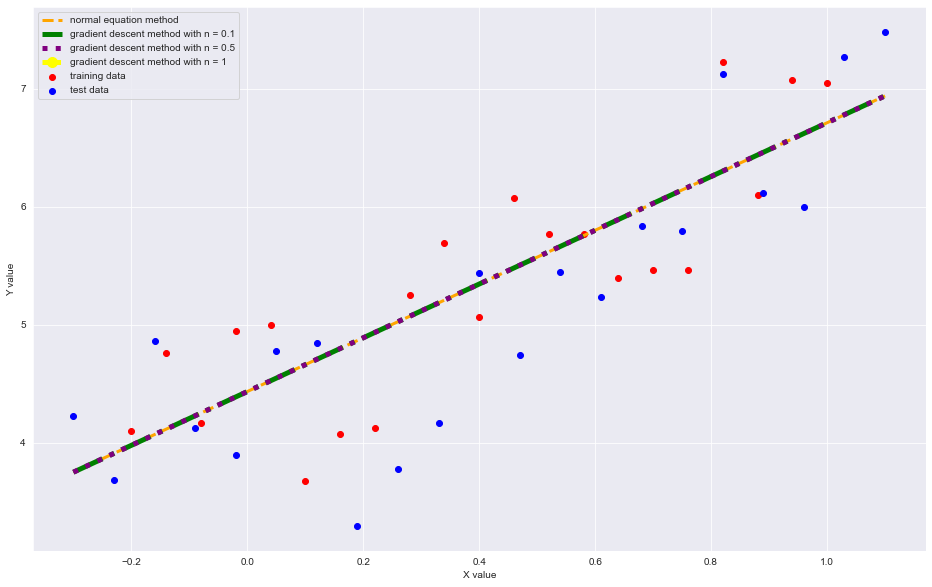

In [9]:
plt.figure(figsize = (16, 10))

X_min = np.min(np.concatenate((X_train, X_test)))
X_max = np.max(np.concatenate((X_train, X_test)))
X = np.array([X_min, X_max])[:, np.newaxis]

plt.plot(X, y_predict(X, w_normal_equation), label='normal equation method', color='orange', linestyle='--', linewidth=3)
plt.plot(X, y_predict(X, w_gradient_descent_1), label='gradient descent method with n = 0.1', color='green', linestyle='-.', linewidth=5)
plt.plot(X, y_predict(X, w_gradient_descent_2), label='gradient descent method with n = 0.5', color='purple', linestyle=':', linewidth=5)
plt.plot(X, y_predict(X, w_gradient_descent_3), label='gradient descent method with n = 1', color='yellow', linestyle='--', linewidth=5, marker='o', markersize=10)
plt.scatter(X_train, Y_train, label='training data', c="red")
plt.scatter(X_test, Y_test, label='test data', c="blue")
plt.legend(['normal equation method', 'gradient descent method with n = 0.1', 'gradient descent method with n = 0.5', 'gradient descent method with n = 1', 'training data', 'test data'])
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [10]:
def stochastic_gradient_descent_algorithm(X, y, num_steps, step_size, epsilon):
    X = add_ones(X)
    w_0 = np.random.random(X.shape[1])
    
    w = w_0.copy()
    w_history = [w.copy()]

    for i in range(num_steps):
        random_index = np.random.randint(X.shape[0])
        random_x = X[random_index, :]
        
        w -= step_size * 2 * np.dot(random_x, np.dot(random_x, w) - y[random_index])
        w_history.append(w.copy())
        if np.linalg.norm(w_history[-1] - w_history[-2]) < epsilon:
            break

    return w, np.array(w_history)

w, history = stochastic_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.01, epsilon)
print(f"w:\n{w}")
history

w:
[4.44301465 2.28820951]


array([[0.2968005 , 0.18772123],
       [0.37256869, 0.20439023],
       [0.47130065, 0.27942652],
       ...,
       [4.43296078, 2.27875747],
       [4.44301854, 2.28821177],
       [4.44301465, 2.28820951]])

In [11]:
w_gradient_descent_1, w_history = stochastic_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.1, epsilon)
print(f"stochastic gradient descent with n = 0.1:\n{w_gradient_descent_1}")
print(f"steps number: {w_history.shape[0]}")
w_gradient_descent_2, w_history = stochastic_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.5, epsilon)
print(f"stochastic gradient descent with n = 0.5:\n{w_gradient_descent_2}")
print(f"steps number: {w_history.shape[0]}")
w_gradient_descent_3, w_history = stochastic_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 1, epsilon)
print(f"stochastic gradient descent with n = 1:\n{w_gradient_descent_3}")
print(f"steps number: {w_history.shape[0]}")
w_history

stochastic gradient descent with n = 0.1:
[4.23833651 2.11305746]
steps number: 17839
stochastic gradient descent with n = 0.5:
[4.88185355 2.86481384]
steps number: 4925


C:\Users\bred7\AppData\Local\Temp\ipykernel_6208\86958404.py:12: RuntimeWarning: overflow encountered in multiply
  w -= step_size * 2 * np.dot(random_x, np.dot(random_x, w) - y[random_index])
C:\Users\bred7\AppData\Local\Temp\ipykernel_6208\86958404.py:12: RuntimeWarning: invalid value encountered in subtract
  w -= step_size * 2 * np.dot(random_x, np.dot(random_x, w) - y[random_index])


stochastic gradient descent with n = 1:
[nan nan]
steps number: 100001


array([[ 0.846565  ,  0.30744247],
       [ 9.1217318 ,  0.63844914],
       [-1.90252993, -0.46397703],
       ...,
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan]])

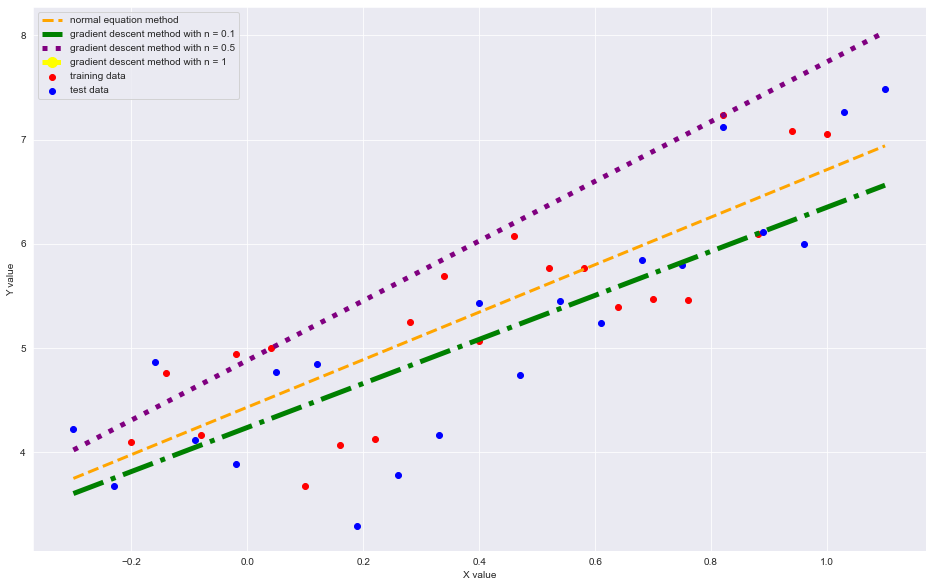

In [12]:
plt.figure(figsize = (16, 10))

plt.plot(X, y_predict(X, w_normal_equation), label='normal equation method', color='orange', linestyle='--', linewidth=3)
plt.plot(X, y_predict(X, w_gradient_descent_1), label='gradient descent method with n = 0.1', color='green', linestyle='-.', linewidth=5)
plt.plot(X, y_predict(X, w_gradient_descent_2), label='gradient descent method with n = 0.5', color='purple', linestyle=':', linewidth=5)
plt.plot(X, y_predict(X, w_gradient_descent_3), label='gradient descent method with n = 1', color='yellow', linestyle='--', linewidth=5, marker='o', markersize=10)
plt.scatter(X_train, Y_train, label='training data', c="red")
plt.scatter(X_test, Y_test, label='test data', c="blue")
plt.legend(['normal equation method', 'gradient descent method with n = 0.1', 'gradient descent method with n = 0.5', 'gradient descent method with n = 1', 'training data', 'test data'])
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [13]:
def mini_batch_gradient_descent_algorithm(X, y, num_steps, step_size, epsilon, mini_batch_size):
    X = add_ones(X)
    w_0 = np.random.random(X.shape[1])
    
    w = w_0.copy()
    w_history = [w.copy()]

    X_indexes = np.array(range(X.shape[0]))
    
    for i in range(num_steps):
        np.random.shuffle(X_indexes)
        sample_indexes = X_indexes[:mini_batch_size]
        mini_batch = X[sample_indexes, :]

        w -= step_size * 2 * np.dot(np.transpose(mini_batch), np.dot(mini_batch, w) - y[sample_indexes]) / mini_batch_size
        w_history.append(w.copy())
        if np.linalg.norm(w_history[-1] - w_history[-2]) < epsilon:
            break

    return w, np.array(w_history)

w, history = mini_batch_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.01, epsilon, 3)
print(f"w:\n{w}")
history

w:
[4.45255236 2.2640513 ]


array([[0.58902719, 0.42559635],
       [0.68872313, 0.48832592],
       [0.77859947, 0.52677481],
       ...,
       [4.44452328, 2.26042499],
       [4.45165222, 2.26359485],
       [4.45255236, 2.2640513 ]])

In [14]:
w_gradient_descent_1, w_history = mini_batch_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.1, epsilon, 3)
print(f"mini batch gradient descent with n = 0.1:\n{w_gradient_descent_1}")
print(f"steps number: {w_history.shape[0]}")
w_gradient_descent_2, w_history = mini_batch_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 0.5, epsilon, 3)
print(f"mini batch gradient descent with n = 0.5:\n{w_gradient_descent_2}")
print(f"steps number: {w_history.shape[0]}")
w_gradient_descent_3, w_history = mini_batch_gradient_descent_algorithm(X_train_2d, Y_train, num_steps, 1, epsilon, 3)
print(f"mini batch gradient descent with n = 1:\n{w_gradient_descent_3}")
print(f"steps number: {w_history.shape[0]}")
w_history

mini batch gradient descent with n = 0.1:
[4.35441693 2.22975955]
steps number: 100001
mini batch gradient descent with n = 0.5:
[4.23795965 2.57024584]
steps number: 100001


C:\Users\bred7\AppData\Local\Temp\ipykernel_6208\4038777879.py:15: RuntimeWarning: overflow encountered in multiply
  w -= step_size * 2 * np.dot(np.transpose(mini_batch), np.dot(mini_batch, w) - y[sample_indexes]) / mini_batch_size
C:\Users\bred7\AppData\Local\Temp\ipykernel_6208\4038777879.py:15: RuntimeWarning: invalid value encountered in subtract
  w -= step_size * 2 * np.dot(np.transpose(mini_batch), np.dot(mini_batch, w) - y[sample_indexes]) / mini_batch_size


mini batch gradient descent with n = 1:
[nan nan]
steps number: 100001


array([[ 0.90436487,  0.3674969 ],
       [ 8.65315568,  4.73479006],
       [-3.58520073, -3.74538045],
       ...,
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan]])

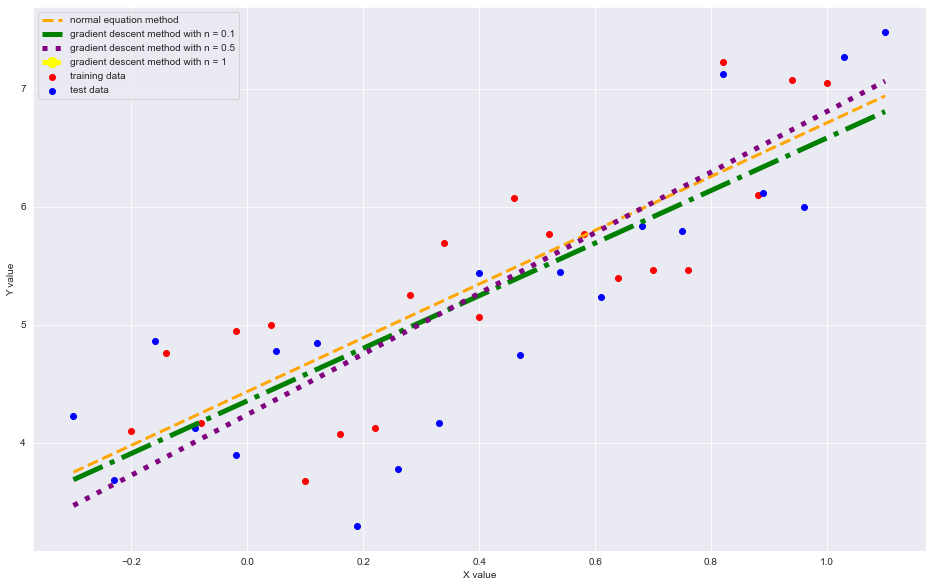

In [15]:
plt.figure(figsize = (16, 10))

plt.plot(X, y_predict(X, w_normal_equation), label='normal equation method', color='orange', linestyle='--', linewidth=3)
plt.plot(X, y_predict(X, w_gradient_descent_1), label='gradient descent method with n = 0.1', color='green', linestyle='-.', linewidth=5)
plt.plot(X, y_predict(X, w_gradient_descent_2), label='gradient descent method with n = 0.5', color='purple', linestyle=':', linewidth=5)
plt.plot(X, y_predict(X, w_gradient_descent_3), label='gradient descent method with n = 1', color='yellow', linestyle='--', linewidth=5, marker='o', markersize=10)
plt.scatter(X_train, Y_train, label='training data', c="red")
plt.scatter(X_test, Y_test, label='test data', c="blue")
plt.legend(['normal equation method', 'gradient descent method with n = 0.1', 'gradient descent method with n = 0.5', 'gradient descent method with n = 1', 'training data', 'test data'])
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()